
<center> <h1  style="background-color:#FF0000; color:#FFFFFF;">Final Year Project<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Predictive Modeling for heart disease risk assessment</h1>  </center>

<b>Prepared By:
<li> Aya El Hajj
<li> Johnny Chreim</b>
    
    

# Undesrtanding Data

The Framingham Heart Study is a long-term, ongoing cardiovascular study conducted in Framingham, Massachusetts, USA. It began in 1948 and has provided valuable insights into the risk factors for cardiovascular disease.

The dataset contains information on various risk factors such as age, gender, blood pressure, cholesterol levels, smoking status, diabetes status, and family history of heart disease. It has been instrumental in identifying and understanding the major risk factors associated with cardiovascular diseases and has contributed to the development of widely used risk assessment tools like the Framingham Risk Score.

##### Columns of the dataset:

#### attributes

•	male : Indicates the gender of the participant (1 for male, 0 for female).

•	age : age of the patient in years.

•   education : Indicates the education level of the participant. 
(1: Less than High School, 2: High School, 3: Undergraduate Degree, 4: Graduate Degree)

•   currentSmoker : Indicates whether the participant is a current smoker (1 for smoker, 0 for non-smoker).

•   cigsPerDay : Represents the number of cigarettes smoked per day.

•   BPmeds : Indicates whether the participant is on blood pressure medication (1 for medication usage, 0 for no usage).

•   prevalentStroke : Indicates whether the participant had a previous stroke (1 for stroke, 0 for no stroke).

•   prevalentHyp : Indicates whether the participant has prevalent hypertension (1 for hypertension, 0 for no hypertension).

•   diabetes : Indicates whether the participant has diabetes (1 for diabetes, 0 for no diabetes).

•   totChol : Represents the total cholesterol level in mg/dL.

•   sysBP : Represents the systolic blood pressure in mmHg.

•   diaBP : Represents the diastolic blood pressure in mmHg.

•   BMI : Represents the body mass index (weight in kg divided by height in meters squared).

•   heartRate : Represents the resting heart rate in beats per minute.

•   glucose : Represents the fasting blood sugar level in mg/dL.

#### Target variable to predict
•   TenYearCHD : The target variable indicating the presence (1) or absence (0) of coronary heart disease within ten years

# Importing Libraries

In [1]:
#Importing the necessary libraries
import pandas as pd
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

# Reading Data

In [3]:
df = pd.read_csv("C:/Users/USER/Desktop/FYP/framingham.csv")

In [8]:
df.shape

(4240, 16)

In [217]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [218]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


# EDA - Exploratory Data Analysis

In [219]:
shape = df.shape
print(" - The dataset contains", shape[1] ,"columns and" , shape[0] , "rows.")

 - The dataset contains 16 columns and 4240 rows.


In [220]:
column_names = df.columns
print(" - The column names are:")
for col in column_names:
    print("    -", col)

 - The column names are:
    - male
    - age
    - education
    - currentSmoker
    - cigsPerDay
    - BPMeds
    - prevalentStroke
    - prevalentHyp
    - diabetes
    - totChol
    - sysBP
    - diaBP
    - BMI
    - heartRate
    - glucose
    - TenYearCHD


In [221]:
#edit some columns names so they become more meaningful
df.rename(columns={'male':'gender', 
                   'prevalentHyp':'prevalentHypertension', 
                   'totChol':'totalCholesterolLevel', 
                   'sysBP':'systolicBP', 
                   'diaBP':'diastolicBP'},inplace=True)

In [222]:
print(" - Total NAs: ", df.isna().sum().sum())
print()
print(df.isna().sum().to_markdown())

 - Total NAs:  645

|                       |   0 |
|:----------------------|----:|
| gender                |   0 |
| age                   |   0 |
| education             | 105 |
| currentSmoker         |   0 |
| cigsPerDay            |  29 |
| BPMeds                |  53 |
| prevalentStroke       |   0 |
| prevalentHypertension |   0 |
| diabetes              |   0 |
| totalCholesterolLevel |  50 |
| systolicBP            |   0 |
| diastolicBP           |   0 |
| BMI                   |  19 |
| heartRate             |   1 |
| glucose               | 388 |
| TenYearCHD            |   0 |


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 4240 non-null   int64  
 1   age                    4240 non-null   int64  
 2   education              4135 non-null   float64
 3   currentSmoker          4240 non-null   int64  
 4   cigsPerDay             4211 non-null   float64
 5   BPMeds                 4187 non-null   float64
 6   prevalentStroke        4240 non-null   int64  
 7   prevalentHypertension  4240 non-null   int64  
 8   diabetes               4240 non-null   int64  
 9   totalCholesterolLevel  4190 non-null   float64
 10  systolicBP             4240 non-null   float64
 11  diastolicBP            4240 non-null   float64
 12  BMI                    4221 non-null   float64
 13  heartRate              4239 non-null   float64
 14  glucose                3852 non-null   float64
 15  TenY

We can see that all the attributes are numerical

In [224]:
df.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHypertension,diabetes,totalCholesterolLevel,systolicBP,diastolicBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Correlation

<AxesSubplot:>

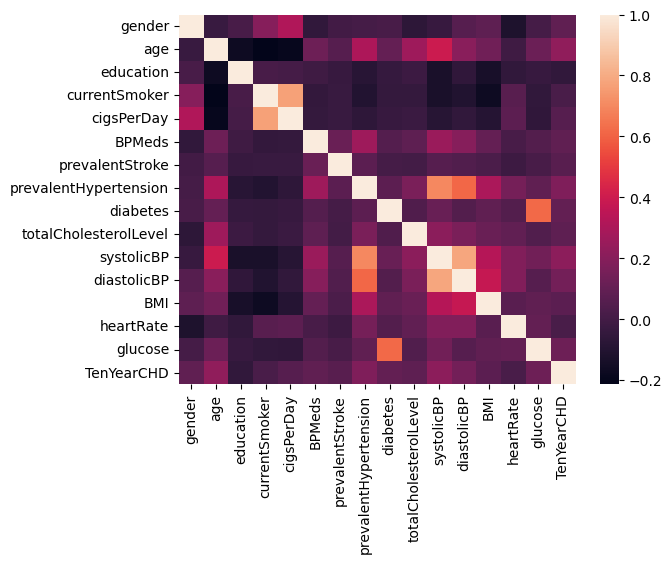

In [225]:
#cehck correlation between columns.
df_corr = df.corr()
sns.heatmap(df_corr)

We can see that there isnt a correlation between the target variable TenYearCHD and education. Thus, the education feature doesnt affect the target variable. We will be dropping this column.

In [226]:
df = df.drop('education', axis=1)

In [227]:
# Checking the correlation between the features and extracting the ones with a correlation higher than 0.7

for col1 in df.columns:
    for col2 in df.columns:
        if col1 == col2:
            break
        else :
            correlation = df[col1].corr(df[col2])
            if correlation > 0.7:
                print(f"Correlation between {col1} and {col2}: {correlation}")

Correlation between cigsPerDay and currentSmoker: 0.769773612002532
Correlation between diastolicBP and systolicBP: 0.7839519585985599


There is a high correlation between 'cigsPerDay' and 'currentSmoker', (the people that doesn't smoke have the same nb of cigs per day which is 0). 
We will be removing the currentSmoker status since its bring less information than CigsPerDay.

'systolicBP' and 'diastolicBP' are supposed to be dependant on eachother, as they help in generating the blood pressure of paitents. 
So we will not drop any of these columns.

In [228]:
df = df.drop(['currentSmoker'], axis=1)

## Boxplot and hist for numerical features

age
Skewness 0.22886703381211243
NAs:  0
count    4240.000000
mean       49.580189
std         8.572942
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_6344\2309746124.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.numerical=df[["age", 'totalCholesterolLevel','cigsPerDay','systolicBP','diastolicBP', 'BMI', 'heartRate','glucose']]


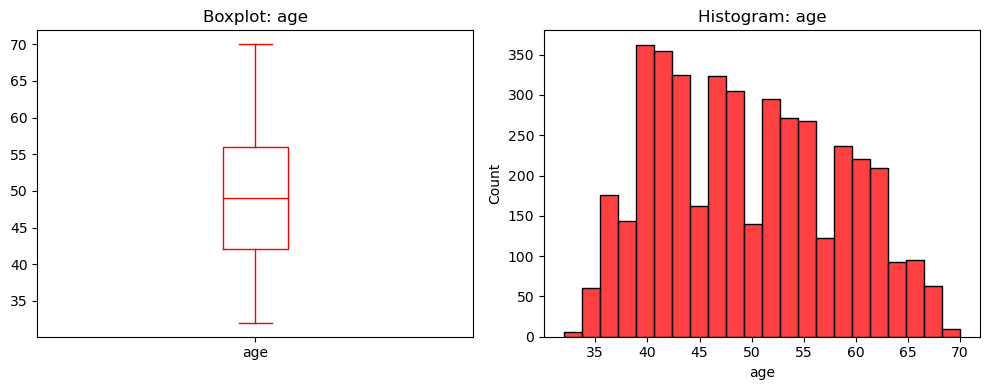

totalCholesterolLevel
Skewness 0.8718805634765354
NAs:  50
count    4190.000000
mean      236.699523
std        44.591284
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totalCholesterolLevel, dtype: float64


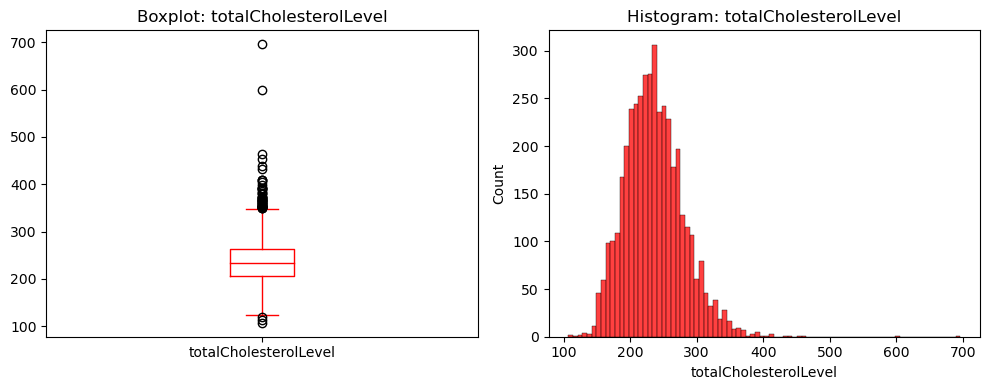

cigsPerDay
Skewness 1.2470523561848126
NAs:  29
count    4211.000000
mean        9.005937
std        11.922462
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64


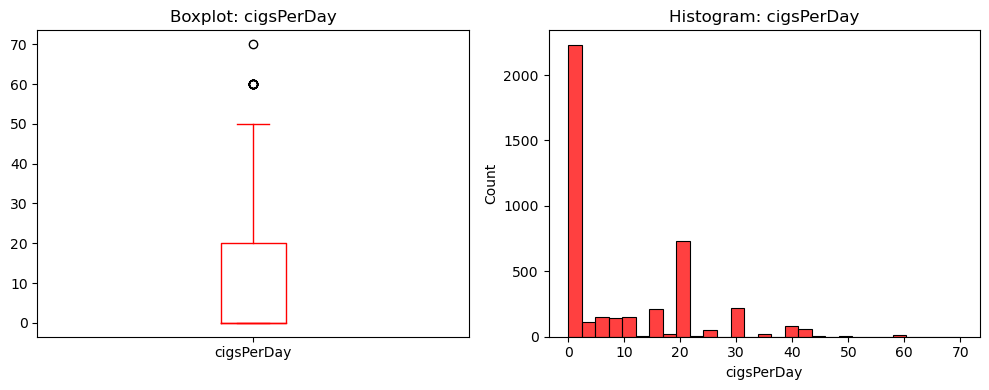

systolicBP
Skewness 1.1452850355293094
NAs:  0
count    4240.000000
mean      132.354599
std        22.033300
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: systolicBP, dtype: float64


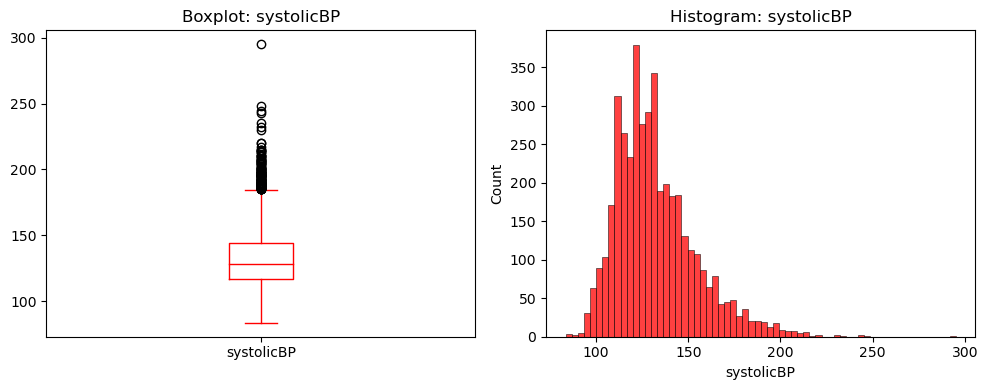

diastolicBP
Skewness 0.7132502128477368
NAs:  0
count    4240.000000
mean       82.897759
std        11.910394
min        48.000000
25%        75.000000
50%        82.000000
75%        90.000000
max       142.500000
Name: diastolicBP, dtype: float64


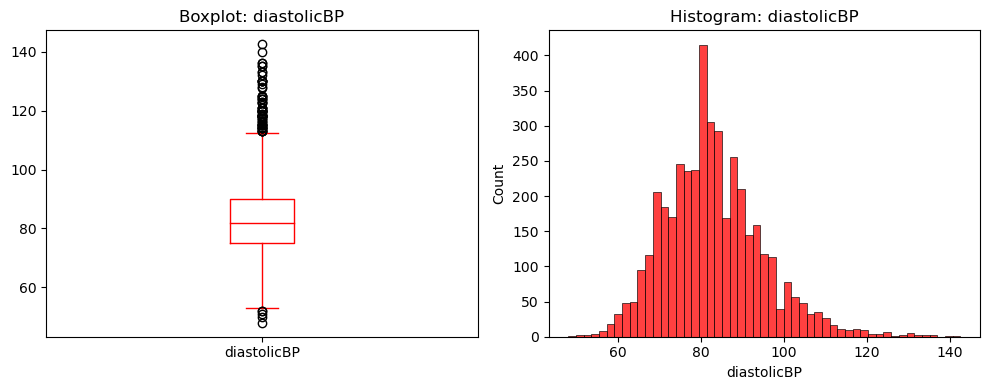

BMI
Skewness 0.9821832986950597
NAs:  19
count    4221.000000
mean       25.800801
std         4.079840
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64


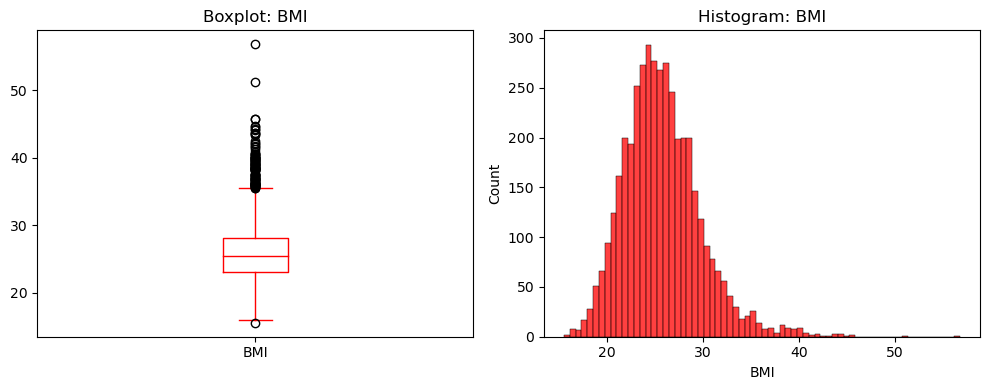

heartRate
Skewness 0.6443718160367701
NAs:  1
count    4239.000000
mean       75.878981
std        12.025348
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64


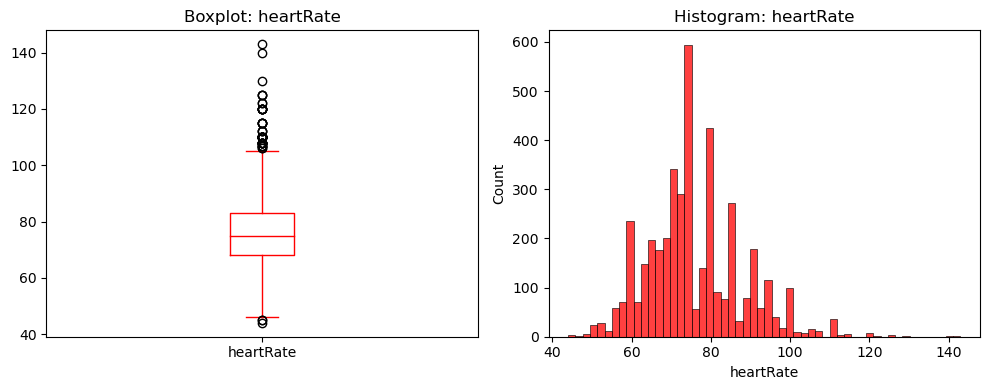

In [229]:
df.numerical=df[["age", 'totalCholesterolLevel','cigsPerDay','systolicBP','diastolicBP', 'BMI', 'heartRate','glucose']]

for col in df.numerical.columns[:-1]:
    print(f"\033[1m\033[4m{col}\033[0m")
    print("Skewness" ,df[col].skew())
    print("NAs: " , df[col].isna().sum())
    print(df[col].describe())
    
    # Create a figure with two subplots (boxplot and histogram)
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Boxplot
    df[col].plot.box(color='red', ax=axes[0])
    axes[0].set_title('Boxplot: {}'.format(col))

    # Histogram
    sns.histplot(data=df[col], color='red',ax=axes[1])
    axes[1].set_title('Histogram: {}'.format(col))
    

    plt.tight_layout()
    plt.show()

## Bar plot for categorical features

gender
NAs:  0
0    2420
1    1820
Name: gender, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_6344\3158684304.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.categorical=df[["gender",'BPMeds', 'prevalentStroke', 'prevalentHypertension','diabetes']]


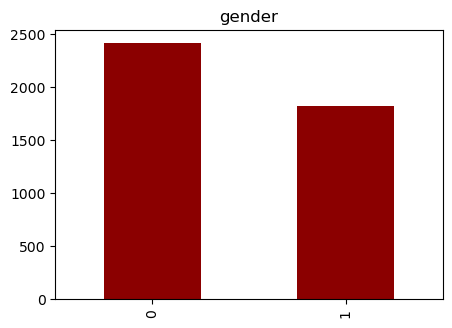

BPMeds
NAs:  53
0.0    4063
1.0     124
Name: BPMeds, dtype: int64


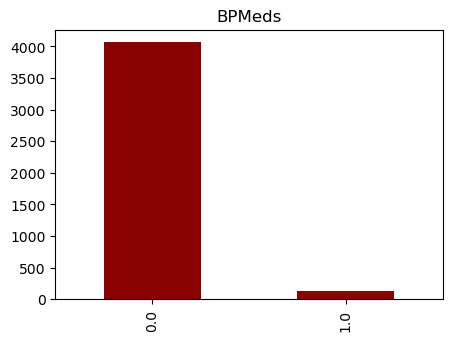

prevalentStroke
NAs:  0
0    4215
1      25
Name: prevalentStroke, dtype: int64


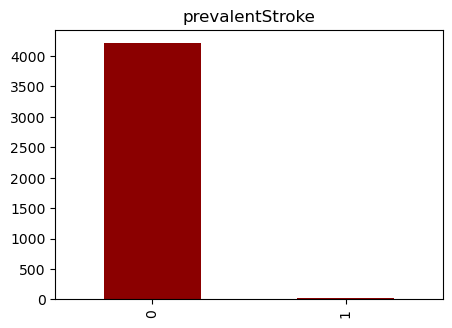

prevalentHypertension
NAs:  0
0    2923
1    1317
Name: prevalentHypertension, dtype: int64


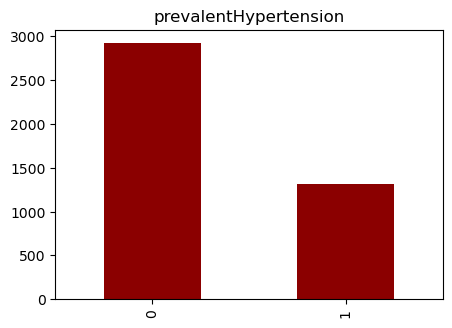

diabetes
NAs:  0
0    4131
1     109
Name: diabetes, dtype: int64


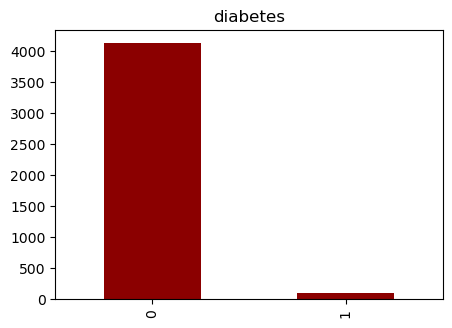

In [230]:
df.categorical=df[["gender",'BPMeds', 'prevalentStroke', 'prevalentHypertension','diabetes']]
for col in df.categorical.columns:
    print(f"\033[1m\033[4m{col}\033[0m")
    print("NAs: " , df[col].isna().sum())
    print(df[col].value_counts())
    plt.figure(figsize=(5,3.5))
    df[col].value_counts().plot(kind="bar",color='darkred')
    plt.title(col)
    plt.show()

## Exploring the Target Variable

TenYearCHD
NAs:  0
Value counts:
 0    3596
1     644
Name: TenYearCHD, dtype: int64


Text(0.5, 1.0, 'TenYearCHD')

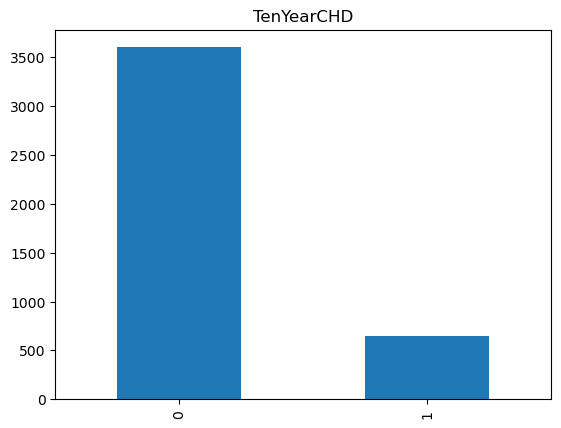

In [231]:
print(f"\033[1m\033[4mTenYearCHD\033[0m")
print("NAs: " , df["TenYearCHD"].isna().sum())
print("Value counts:\n" ,df["TenYearCHD"].value_counts())

df["TenYearCHD"].value_counts().plot(kind="bar")
plt.title("TenYearCHD")

# Data Cleaning

In [232]:
#Checking duplicates
df.duplicated().sum()

0

In [233]:
#Checking the % of NAs in each col
column_percentages = {}

for column in df.columns:
    total_missing = df[column].isna().sum()
    if total_missing != 0:
        total_cells = df[column].size
        percentage_missing = (total_missing / total_cells) * 100
        column_percentages[column] = percentage_missing

print("Percentage of missing values for each column:")
for column, percentage in column_percentages.items():
    print(f"{column}: {percentage:.2f}%")

Percentage of missing values for each column:
cigsPerDay: 0.68%
BPMeds: 1.25%
totalCholesterolLevel: 1.18%
BMI: 0.45%
heartRate: 0.02%
glucose: 9.15%


## Dealing with Missing Data
<br>
<li> Remove NAs
<li> Fill by Mean And Mode
<li> Fill By KNN
<li> Fill By Next
<li> Fill By Previous

Since the % of NAs is low, we can drop them all or we can fill them.

### Removing

In [11]:
def RemoveNAS(df):
    df_rNA = df.dropna()
    return df_rNA

In [235]:
#Testing the function
print("Original df shape: " , df.shape)
df_rNA = RemoveNAS(df)
print("df shape with removing NAs: " , df_rNA.shape)

Original df shape:  (4240, 14)
df shape with removing NAs:  (3751, 14)


In [236]:
df.isnull().any()

gender                   False
age                      False
cigsPerDay                True
BPMeds                    True
prevalentStroke          False
prevalentHypertension    False
diabetes                 False
totalCholesterolLevel     True
systolicBP               False
diastolicBP              False
BMI                       True
heartRate                 True
glucose                   True
TenYearCHD               False
dtype: bool

### Imputing
<br>
<li> Fill by Mean And Mode
<li> Fill By KNN
<li> Fill By Next
<li> Fill By Previous

In [237]:
def FillbyMeanAndMode(df):
    df_fill = df.copy()  # Create a copy of the original DataFrame

    categorical_columns = df_fill.select_dtypes(include='object').columns
    numerical_columns = df_fill.select_dtypes(exclude='object').columns

    for column in df_fill.columns:
        if column in categorical_columns:
            if df_fill[column].isna().any():
                mode_value = df_fill[column].mode()[0]
                df_fill[column].fillna(mode_value, inplace=True)
        elif column in numerical_columns:
            if df_fill[column].isna().any():
                mean_value = df_fill[column].mean()
                df_fill[column].fillna(mean_value, inplace=True)
    return df_fill

In [238]:
#Testing the function
print("Original df shape: " , df.shape)
df_fill = FillbyMeanAndMode(df.copy()) 
print("df shape with filling NAs by Mean and Mode: " , df_fill.shape)
print(df_fill.isna().sum().sum())

Original df shape:  (4240, 14)
df shape with filling NAs by Mean and Mode:  (4240, 14)
0


In [239]:
def FillByKNN(df):
    imputer = KNNImputer(n_neighbors=5)
    df_KNN = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
    return df_KNN

In [240]:
#Testing the function

print("Original df shape: " , df.shape)
df_KNN = FillByKNN(df)
print("df shape with filling NAs by KNN: " , df_KNN.shape)
print(df_KNN.isna().sum().sum())

Original df shape:  (4240, 14)
df shape with filling NAs by KNN:  (4240, 14)
0


In [241]:
def fillByNext(df):
    df.fillna(method ='bfill', inplace=True)
    return df

In [242]:
#Testing the function

print("Original df shape: " , df.shape)
df_bfill = fillByNext(df)
print("df shape with filling NAs by next: " , df_bfill.shape)
print(df_bfill.isna().sum().sum())

Original df shape:  (4240, 14)
df shape with filling NAs by next:  (4240, 14)
0


In [243]:
def fillByPrevious(df):
    df.fillna(method='ffill', inplace=True)
    return df

In [244]:
#Testing the function

print("Original df shape: " , df.shape)
df_prevFill = fillByNext(df)
print("df shape with filling NAs by previous: " , df_prevFill.shape)
print(df_prevFill.isna().sum().sum())

Original df shape:  (4240, 14)
df shape with filling NAs by previous:  (4240, 14)
0


## Dealing with outliers
<br>
<li> Keep the outliers
<li> Remove Outliers By Standard Deviation
<li> Remove Outliers By IQR All
<li> Remove Outliers Using Dbscan

In [245]:
# checking for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df.numerical < (Q1 - 1.5 * IQR)) | (df.numerical > (Q3 + 1.5 * IQR))).sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_6344\3965681642.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df.numerical < (Q1 - 1.5 * IQR)) | (df.numerical > (Q3 + 1.5 * IQR))).sum()


BMI                       97
BPMeds                     0
TenYearCHD                 0
age                        0
cigsPerDay                12
diabetes                   0
diastolicBP               77
gender                     0
glucose                  188
heartRate                 76
prevalentHypertension      0
prevalentStroke            0
systolicBP               126
totalCholesterolLevel     56
dtype: int64

In [246]:
def KeepOutliers(df):
    return df

In [247]:
def RemoveOutliersByStandardDeviation(df):
    for col in df.columns:
        data_mean = np.mean(df[col])
        data_std = np.std(df[col])
        cut_off = data_std * 3
        lower = data_mean - cut_off
        upper = data_mean + cut_off

        df= df[(df[col] > lower) & (df[col] < upper)]

    return df

In [248]:
#Testing the function

print("Original df shape: " , df.shape)
print(df["TenYearCHD"].value_counts())
df_removeByStd = RemoveOutliersByStandardDeviation(df)
print("df shape after removing outliers (method1): " , df_removeByStd.shape)
df_removeByStd["TenYearCHD"].value_counts()

Original df shape:  (4240, 14)
0    3596
1     644
Name: TenYearCHD, dtype: int64
df shape after removing outliers (method1):  (3777, 14)


0    3285
1     492
Name: TenYearCHD, dtype: int64

In [249]:
from scipy import stats

def RemoveOutliersByIQRAll(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]

    return df

In [250]:
#Testing the function

print("Original df shape: " , df.shape)
df_removeByIQR = RemoveNAS(df)
df_removeByIQR = RemoveOutliersByIQRAll(df)
print("df shape after removing outliers (method2): " , df_removeByIQR.shape)
df_removeByIQR["TenYearCHD"].value_counts()

Original df shape:  (4240, 14)
df shape after removing outliers (method2):  (3069, 14)


0    3069
Name: TenYearCHD, dtype: int64

We won't be using this method above since it removed all the TenYearCHD with 1 value rows.

In [251]:
from sklearn.cluster import DBSCAN

def RemoveOutliersDbscan(df):
    df = RemoveNAS(df)
    dbscan = DBSCAN(eps=100, min_samples=100)
    dbscan.fit(df)
    labels = dbscan.labels_
    non_outlier_indices = np.where(labels != -1)[0]
    df = df.iloc[non_outlier_indices, :]

    return df

In [252]:
#Testing the function

print("Original df shape: " , df.shape)
print(df["TenYearCHD"].value_counts())
df_DBSCAN = RemoveOutliersDbscan(df)
print("df shape after removing outliers (method3): " , df_DBSCAN.shape)
print(df_DBSCAN["TenYearCHD"].value_counts())


Original df shape:  (4240, 14)
0    3596
1     644
Name: TenYearCHD, dtype: int64
df shape after removing outliers (method3):  (4227, 14)
0    3591
1     636
Name: TenYearCHD, dtype: int64


# Data Transformation

In [253]:
def AllFeatures(df):
    df = df.drop("TenYearCHD", axis=1)
    return df

## Scaling

In [254]:
from sklearn.preprocessing import MinMaxScaler

def scaling(df):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    df = pd.DataFrame(scaled_data, columns=df.columns.tolist())
    return df

## Feature Selection

In [255]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

def SelectKBestFunction(df):
    df= RemoveNAS(df)
    X = df.drop("TenYearCHD", axis=1)
    y = df["TenYearCHD"]
    bestfeatures = SelectKBest(score_func=chi2, k=10)
    fit = bestfeatures.fit(X, y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    global featureScores
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs', 'Score']
    df = featureScores.sort_values('Score', ascending=False).reset_index(drop=True)
    df = df.head(10)  # Select the top 10 features (or adjust the number as needed)
    selected_features = df['Specs'].tolist()
    df = X[selected_features]

    return df


In [256]:
#Testing the function
 
df_KBest = scaling(df)
df_KBest = SelectKBestFunction(df)
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
8,systolicBP,727.935535
12,glucose,403.114269
1,age,319.266019
7,totalCholesterolLevel,251.803287
2,cigsPerDay,223.570685
9,diastolicBP,152.748563
5,prevalentHypertension,92.048736
6,diabetes,39.144944
3,BPMeds,29.447328
0,gender,18.899930


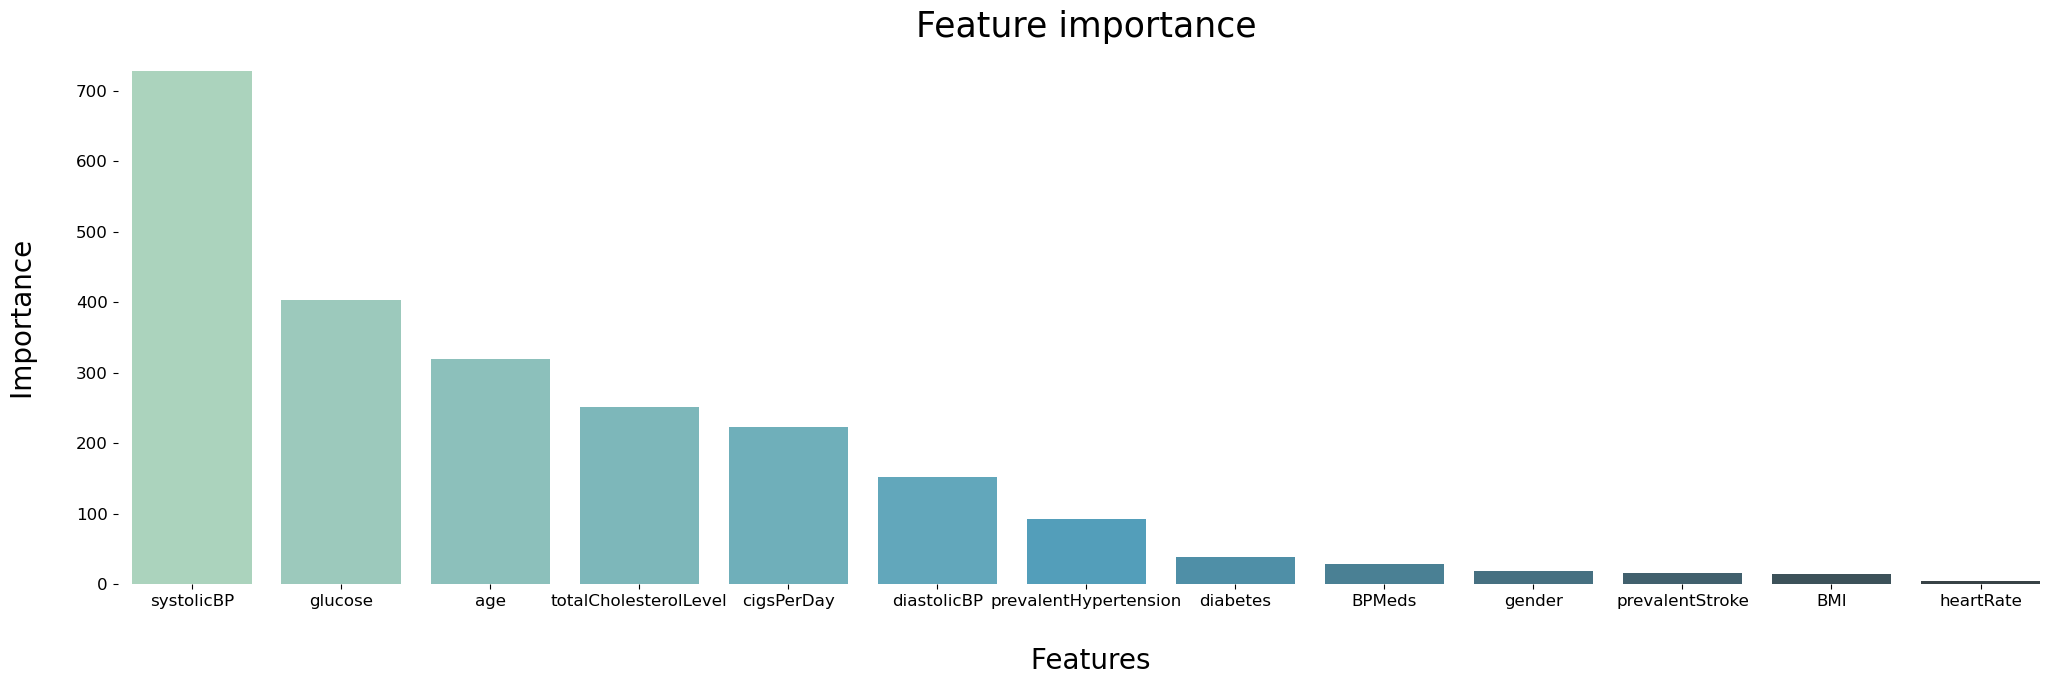

In [257]:
# visualizing feature selection
plt.figure(figsize=(25,7))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=25)
plt.xlabel('\n Features', fontsize=20)
plt.ylabel('Importance \n', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [258]:
from sklearn.feature_selection import SelectPercentile, chi2

def SelectPercentileFunction(df):
    df = RemoveNAS(df)
    X = df.drop("TenYearCHD", axis=1)
    y = df["TenYearCHD"]
    df = df.drop("TenYearCHD", axis=1)
    selector = SelectPercentile(chi2, percentile=90)
    selected_features = selector.fit_transform(X, y)
    df = pd.DataFrame(selected_features, columns=X.columns[selector.get_support()])
    
    return df

In [259]:
#Testing the function
df_per = scaling(df)
df_per = SelectPercentileFunction(df)
print(df_per.shape)

(4240, 11)


In [260]:
from sklearn.feature_selection import VarianceThreshold

def VarianceThresholdFunction(df):
    df = RemoveNAS(df)
    df = df.drop("TenYearCHD", axis=1)
    sel = VarianceThreshold(0.015)
    transformed_data = sel.fit_transform(df)
    df = pd.DataFrame(transformed_data, columns=df.columns[sel.get_support(indices=True)])
    
    return df

In [261]:
#Testing the function
df_var = scaling(df)
df_var = VarianceThresholdFunction(df)
print(df_var.shape)

(4240, 12)


## Feature Engineering

In [262]:
from sklearn.decomposition import PCA

def dimReduction(df):
    df = RemoveNAS(df)
    df = df.drop("TenYearCHD", axis=1)
    pca = PCA(n_components = 0.95)
    pca.fit(df)
    reduced = pca.transform(df)
    df = pd.DataFrame(reduced)
    return df

In [263]:
#Testing the function
df_PCA = scaling(df)
y = df_PCA["TenYearCHD"]
df_PCA = dimReduction(df)
df_PCA["TenYearCHD"] = y

print(df_PCA.shape)
print(df_PCA.isna().sum().sum())

(4240, 6)
0


# Balancing

In [264]:
def NoBalancing(df):
    return df

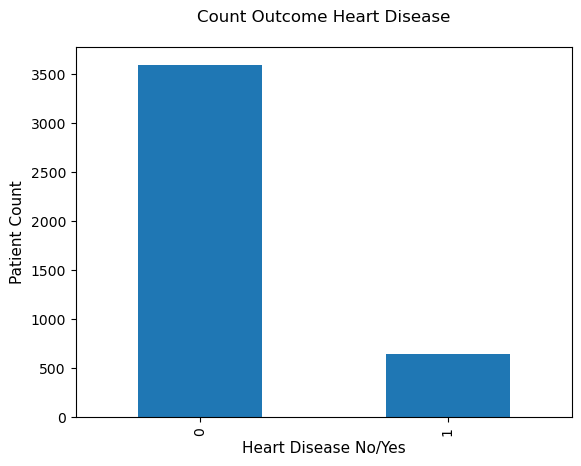

In [265]:
# checking the distribution of the target variable (imbalanced)
df["TenYearCHD"].value_counts().plot(kind = "bar")
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

## Under Sampling

In [4]:
def UnderSampling(df):
    # Shuffle df
    shuffled_df = df.sample(frac=1, random_state=4)

    # Put all the fraud class in a separate dataset.
    CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

    # Randomly select observations from the non-fraud (majority class)
    non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=len(CHD_df), random_state=42)

    # Concatenate both dataframes again
    normalized_df = pd.concat([CHD_df, non_CHD_df])

    return normalized_df


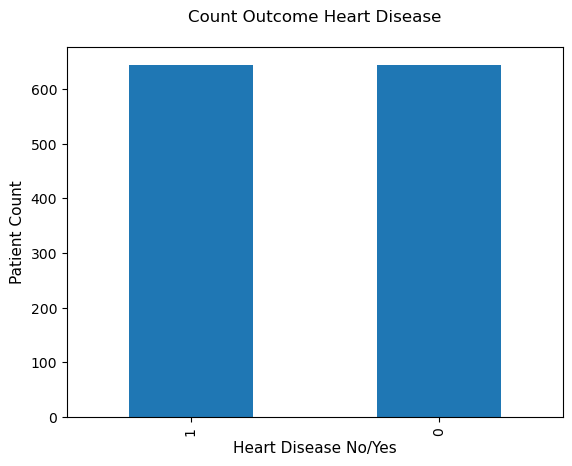

In [5]:
# Checling the distribution after undersampling 
df_us = UnderSampling(df)
df_us["TenYearCHD"].value_counts().plot(kind = "bar")
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

In [7]:
df_us.shape

(1288, 16)

## Over Sampling

In [9]:
from imblearn.over_sampling import SMOTE

def OverSampling(df):
    df = RemoveNAS(df)
    # Split the dataset into features (X) and class labels (y)
    X = df.drop('TenYearCHD', axis=1)
    y = df['TenYearCHD']

    # Instantiate the SMOTE oversampler
    smote = SMOTE()

    # Perform oversampling
    X_oversampled, y_oversampled = smote.fit_resample(X, y)

    # Create a DataFrame for the oversampled data
    oversampled_df = pd.DataFrame(X_oversampled, columns=X.columns)
    oversampled_df['TenYearCHD'] = y_oversampled

    return oversampled_df

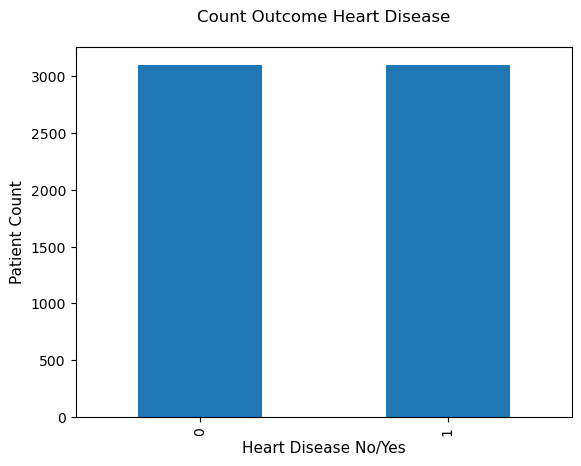

In [12]:
# Checling the distribution after oversampling 

df_os = OverSampling(df)
df_os["TenYearCHD"].value_counts().plot(kind = "bar")
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

In [13]:
df_os.shape

(6202, 16)

# Data Preparation

To find the best model, we will use the "Try and Catch" method which consists of trying all the possible options to prepare our data. 

We will be dealing with correlated features, missing values, outliers, categorical columns, scaling and data reduction in many ways.

In [270]:
output_path = "C:/Users/USER/Downloads/FYP/edited_dataset.csv"
df.to_csv(output_path, index=False)

In [271]:
DealingMissingValues = [RemoveNAS , FillbyMeanAndMode, FillByKNN, fillByNext, fillByPrevious]

DealingWithOutliers = [KeepOutliers, RemoveOutliersByStandardDeviation, RemoveOutliersDbscan]

FeatureSelectionAndEngineering = [AllFeatures, SelectKBestFunction, SelectPercentileFunction, VarianceThresholdFunction, dimReduction]

Balancing = [NoBalancing, UnderSampling, OverSampling]

In [272]:
path = "C:/Users/USER/Downloads/FYP/edited_dataset.csv"

def DataPreparation(path):
    dataframes = {}
    for DealingMissingValuesFunction in DealingMissingValues:
        for DealingWithOutliersFunction in DealingWithOutliers:
            for FeatureSelectionAndEngineeringFunction in FeatureSelectionAndEngineering:
                for BalancingFunction in Balancing:
                    df = pd.read_csv(path)
                    df_name = "df_" + DealingMissingValuesFunction.__name__ + "_" + DealingWithOutliersFunction.__name__ + "_" + FeatureSelectionAndEngineeringFunction.__name__ + "_" + BalancingFunction.__name__
#                     df = checkCorrrelation_dropCorrelated(df)
                    df = DealingMissingValuesFunction(df)
                    df = DealingWithOutliersFunction(df)
                    df = scaling(df)
                    y = df["TenYearCHD"]
                    df = FeatureSelectionAndEngineeringFunction(df)
                    df["TenYearCHD"] = y
#                     print(df_name, df.isna().sum().sum())
                    df = BalancingFunction(df)
#                     print(df_name , df.isna().sum().sum())

                    dataframes[df_name] = df.copy()
    #                 print(df_name, dataframes[df_name].shape)  
                
    return dataframes

In [273]:
# This code may take a while because its generating all possible combinations
# of data in order to select the best one.
dataframes = DataPreparation(path)

In [274]:
from sklearn.model_selection import train_test_split 

def splittingData(df):
    y = df["TenYearCHD"]
    X = df.drop("TenYearCHD", axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2) 
    
    return X_train, X_test, y_train, y_test


# Models

Supervised learning, labeled data, imbalanced, dont use accuracy, confusion matrix

<li> KNN <li> Logistic Regression<li>Decision Tree <li> Naive Bayes <li> Random Forest <li>SVM

## KNN

In [275]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

def knnModel(dataframes):
    recall_list = []
    precision_list = []
    accuracy_list = []
    f1_list = []

    for df in dataframes:
        dataframe = dataframes[df].copy()
        X_train, X_test, y_train, y_test = splittingData(dataframe)
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        recall_list.append((df, recall))
        precision_list.append((df, precision))
        accuracy_list.append((df, accuracy))
        f1_list.append((df, f1))

    recall_list.sort(key=lambda x: x[1], reverse=True)
    precision_list.sort(key=lambda x: x[1], reverse=True)
    accuracy_list.sort(key=lambda x: x[1], reverse=True)
    f1_list.sort(key=lambda x: x[1], reverse=True)
    top_dfs = 5

    print("Dataframes with the highest Recall, Precision, Accuracy, and F1-score:")
    print()
    
    result = []

    for i in range(top_dfs):
        df_recall = recall_list[i]
        df_precision = precision_list[i]
        df_accuracy = accuracy_list[i]
        df_f1 = f1_list[i]
        df_name = df_recall[0]
        df_shape = dataframes[df_name].shape
        recall = df_recall[1]
        precision = df_precision[1]
        accuracy = df_accuracy[1]
        f1 = df_f1[1]

        print(f"\033[1m{df_name}\033[0m {df_shape}")
        print("Recall:", recall)
        print("Precision:", precision)
        print("Accuracy:", accuracy)
        print("F1-score:", f1)
        print()
    
        result.append({'DataFrame': df_name,'Shape': df_shape,'Recall': recall,'Precision': precision,'Accuracy': accuracy,'F1-score': f1})

    return result



## Logistic Regression

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

def LogisticRegressionModel(dataframes):
    recall_list = []
    precision_list = []
    accuracy_list = []  # Add accuracy_list
    f1_list = []  # Add f1_list

    for df in dataframes:
        dataframe = dataframes[df].copy()
        X_train, X_test, y_train, y_test = splittingData(dataframe)
        # Create a Logistic Regression classifier
        logreg = LogisticRegression(random_state=42)
        # Train the model on the training data
        logreg.fit(X_train, y_train)
        # Make predictions on the test data
        y_pred = logreg.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        recall_list.append((df, recall))
        precision_list.append((df, precision))
        accuracy_list.append((df, accuracy))  # Add accuracy to the list
        f1_list.append((df, f1))  # Add F1-score to the list

    recall_list.sort(key=lambda x: x[1], reverse=True)
    precision_list.sort(key=lambda x: x[1], reverse=True)
    accuracy_list.sort(key=lambda x: x[1], reverse=True)
    f1_list.sort(key=lambda x: x[1], reverse=True)
    top_dfs = 5

    print("Df with the highest Recall, Precision, Accuracy, and F1-score:")
    print()
    
    result = []

    for i in range(top_dfs):
        df_recall = recall_list[i]
        df_precision = precision_list[i]
        df_accuracy = accuracy_list[i]  # Retrieve accuracy for the corresponding dataframe
        df_f1 = f1_list[i]  # Retrieve F1-score for the corresponding dataframe
        df_name = df_recall[0]
        df_shape = dataframes[df_name].shape
        recall = df_recall[1]
        precision = df_precision[1]
        accuracy = df_accuracy[1]  # Retrieve accuracy from the tuple
        f1 = df_f1[1]  # Retrieve F1-score from the tuple

        print(f"\033[1m", df_name, "\033[0m", df_shape)
        print("Recall:", recall)
        print("Precision:", precision)
        print("Accuracy:", accuracy)  # Print accuracy
        print("F1-score:", f1)  # Print F1-score
        print()
        
        result.append({
            'DataFrame': df_name,
            'Shape': df_shape,
            'Recall': recall,
            'Precision': precision,
            'Accuracy': accuracy,
            'F1-score': f1
        })
    return result




## Decision Tree

In [277]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

def DecisionTreeModel(dataframes):
    recall_list = []
    precision_list = []
    accuracy_list = []
    f1_list = []

    for df in dataframes:
        dataframe = dataframes[df].copy()
        X_train, X_test, y_train, y_test = splittingData(dataframe)
        decision_tree = DecisionTreeClassifier(random_state=42)
        decision_tree.fit(X_train, y_train)
        y_pred = decision_tree.predict(X_test)

        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        recall_list.append((df, recall))
        precision_list.append((df, precision))
        accuracy_list.append((df, accuracy))
        f1_list.append((df, f1))

    recall_list.sort(key=lambda x: x[1], reverse=True)
    precision_list.sort(key=lambda x: x[1], reverse=True)
    accuracy_list.sort(key=lambda x: x[1], reverse=True)
    f1_list.sort(key=lambda x: x[1], reverse=True)
    top_dfs = 5

    print("Dataframes with the highest Recall, Precision, Accuracy, and F1-score:")
    print()
    
    result = []

    for i in range(top_dfs):
        df_recall = recall_list[i]
        df_precision = precision_list[i]
        df_accuracy = accuracy_list[i]
        df_f1 = f1_list[i]
        df_name = df_recall[0]
        df_shape = dataframes[df_name].shape
        recall = df_recall[1]
        precision = df_precision[1]
        accuracy = df_accuracy[1]
        f1 = df_f1[1]

        print(f"\033[1m{df_name}\033[0m {df_shape}")
        print("Recall:", recall)
        print("Precision:", precision)
        print("Accuracy:", accuracy)
        print("F1-score:", f1)
        print()
        
        result.append({
            'DataFrame': df_name,
            'Shape': df_shape,
            'Recall': recall,
            'Precision': precision,
            'Accuracy': accuracy,
            'F1-score': f1
        })
        
    return result



## Naive Bayes

In [278]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

def NaiveBayesModel(dataframes):
    recall_list = []
    precision_list = []
    accuracy_list = []
    f1_list = []

    for df in dataframes:
        dataframe = dataframes[df].copy()
        X_train, X_test, y_train, y_test = splittingData(dataframe)
        naive_bayes = GaussianNB()
        naive_bayes.fit(X_train, y_train)
        y_pred = naive_bayes.predict(X_test)

        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        recall_list.append((df, recall))
        precision_list.append((df, precision))
        accuracy_list.append((df, accuracy))
        f1_list.append((df, f1))

    recall_list.sort(key=lambda x: x[1], reverse=True)
    precision_list.sort(key=lambda x: x[1], reverse=True)
    accuracy_list.sort(key=lambda x: x[1], reverse=True)
    f1_list.sort(key=lambda x: x[1], reverse=True)
    top_dfs = 5
    result = []

    print("Dataframes with the highest Recall, Precision, Accuracy, and F1-score:")
    print()
    for i in range(top_dfs):
        df_recall = recall_list[i]
        df_precision = precision_list[i]
        df_accuracy = accuracy_list[i]
        df_f1 = f1_list[i]
        df_name = df_recall[0]
        df_shape = dataframes[df_name].shape
        recall = df_recall[1]
        precision = df_precision[1]
        accuracy = df_accuracy[1]
        f1 = df_f1[1]

        print(f"\033[1m{df_name}\033[0m {df_shape}")
        print("Recall:", recall)
        print("Precision:", precision)
        print("Accuracy:", accuracy)
        print("F1-score:", f1)
        print()
        
        result.append({
            'DataFrame': df_name,
            'Shape': df_shape,
            'Recall': recall,
            'Precision': precision,
            'Accuracy': accuracy,
            'F1-score': f1
        })
    return result


## Random Forest

In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

def RandomForestModel(dataframes):
    recall_list = []
    precision_list = []
    accuracy_list = []
    f1_list = []

    for df in dataframes:
        dataframe = dataframes[df].copy()
        X_train, X_test, y_train, y_test = splittingData(dataframe)
        random_forest = RandomForestClassifier(n_estimators=100,random_state=42)
        random_forest.fit(X_train, y_train)
        y_pred = random_forest.predict(X_test)

        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        recall_list.append((df, recall))
        precision_list.append((df, precision))
        accuracy_list.append((df, accuracy))
        f1_list.append((df, f1))

    recall_list.sort(key=lambda x: x[1], reverse=True)
    precision_list.sort(key=lambda x: x[1], reverse=True)
    accuracy_list.sort(key=lambda x: x[1], reverse=True)
    f1_list.sort(key=lambda x: x[1], reverse=True)
    top_dfs = 5
    
    result = []

    print("Dataframes with the highest Recall, Precision, Accuracy, and F1-score:")
    print()
    for i in range(top_dfs):
        df_recall = recall_list[i]
        df_precision = precision_list[i]
        df_accuracy = accuracy_list[i]
        df_f1 = f1_list[i]
        df_name = df_recall[0]
        df_shape = dataframes[df_name].shape
        recall = df_recall[1]
        precision = df_precision[1]
        accuracy = df_accuracy[1]
        f1 = df_f1[1]

        print(f"\033[1m{df_name}\033[0m {df_shape}")
        print("Recall:", recall)
        print("Precision:", precision)
        print("Accuracy:", accuracy)
        print("F1-score:", f1)
        print()
        
        result.append({
            'DataFrame': df_name,
            'Shape': df_shape,
            'Recall': recall,
            'Precision': precision,
            'Accuracy': accuracy,
            'F1-score': f1
        })
    return result


## Support Vector Machines

In [280]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

def SVMModel(dataframes):
    recall_list = []
    precision_list = []
    accuracy_list = []
    f1_list = []

    for df in dataframes:
        dataframe = dataframes[df].copy()
        X_train, X_test, y_train, y_test = splittingData(dataframe)
        svm = SVC(random_state=42)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)

        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        recall_list.append((df, recall))
        precision_list.append((df, precision))
        accuracy_list.append((df, accuracy))
        f1_list.append((df, f1))

    recall_list.sort(key=lambda x: x[1], reverse=True)
    precision_list.sort(key=lambda x: x[1], reverse=True)
    accuracy_list.sort(key=lambda x: x[1], reverse=True)
    f1_list.sort(key=lambda x: x[1], reverse=True)
    top_dfs = 5
    result = []

    print("Dataframes with the highest Recall, Precision, Accuracy, and F1-score:")
    print()
    for i in range(top_dfs):
        df_recall = recall_list[i]
        df_precision = precision_list[i]
        df_accuracy = accuracy_list[i]
        df_f1 = f1_list[i]
        df_name = df_recall[0]
        df_shape = dataframes[df_name].shape
        recall = df_recall[1]
        precision = df_precision[1]
        accuracy = df_accuracy[1]
        f1 = df_f1[1]

        print(f"\033[1m{df_name}\033[0m {df_shape}")
        print("Recall:", recall)
        print("Precision:", precision)
        print("Accuracy:", accuracy)
        print("F1-score:", f1)
        print()
        result.append({
            'DataFrame': df_name,
            'Shape': df_shape,
            'Recall': recall,
            'Precision': precision,
            'Accuracy': accuracy,
            'F1-score': f1
        })
        
    return result


# Trying all the models on all the combinations of the data and choosing the best one

In [281]:
knnTopDf = knnModel(dataframes)

Dataframes with the highest Recall, Precision, Accuracy, and F1-score:

df_fillByNext_RemoveOutliersByStandardDeviation_AllFeatures_OverSampling (6570, 14)
Recall: 0.9865841073271414
Precision: 0.7472613458528952
Accuracy: 0.8677248677248677
F1-score: 0.8500222518914108

df_fillByPrevious_RemoveOutliersByStandardDeviation_SelectPercentileFunction_OverSampling (6570, 12)
Recall: 0.9855521155830753
Precision: 0.7419859265050821
Accuracy: 0.8677248677248677
F1-score: 0.8449955713020372

df_RemoveNAS_RemoveOutliersByStandardDeviation_AllFeatures_OverSampling (6570, 14)
Recall: 0.9845201238390093
Precision: 0.7413522012578616
Accuracy: 0.8677248677248677
F1-score: 0.844306049822064

df_RemoveNAS_RemoveOutliersByStandardDeviation_SelectPercentileFunction_OverSampling (6570, 12)
Recall: 0.9824561403508771
Precision: 0.7401883830455259
Accuracy: 0.8677248677248677
F1-score: 0.8415885765283355

df_fillByPrevious_RemoveOutliersByStandardDeviation_AllFeatures_OverSampling (6570, 14)
Recall: 0.982

In [282]:
LogiRegTopDf = LogisticRegressionModel(dataframes)

Df with the highest Recall, Precision, Accuracy, and F1-score:

 df_fillByPrevious_RemoveOutliersByStandardDeviation_dimReduction_OverSampling  (6570, 9)
Recall: 0.7316821465428277
Precision: 0.75
Accuracy: 0.8809523809523809
F1-score: 0.6983184965380811

 df_RemoveNAS_RemoveOutliersByStandardDeviation_SelectPercentileFunction_OverSampling  (6570, 12)
Recall: 0.7285861713106295
Precision: 0.75
Accuracy: 0.8809523809523809
F1-score: 0.6974913920314805

 df_RemoveNAS_RemoveOutliersByStandardDeviation_VarianceThresholdFunction_OverSampling  (6570, 11)
Recall: 0.7285861713106295
Precision: 0.75
Accuracy: 0.8809523809523809
F1-score: 0.6959093149334648

 df_RemoveNAS_RemoveOutliersByStandardDeviation_dimReduction_OverSampling  (6570, 9)
Recall: 0.7275541795665634
Precision: 0.75
Accuracy: 0.8809523809523809
F1-score: 0.6949236076885166

 df_RemoveNAS_RemoveOutliersByStandardDeviation_AllFeatures_OverSampling  (6570, 14)
Recall: 0.7213622291021672
Precision: 0.75
Accuracy: 0.8809523809523809

In [283]:
DecisionTreeTopDf = DecisionTreeModel(dataframes)

Dataframes with the highest Recall, Precision, Accuracy, and F1-score:

df_RemoveNAS_RemoveOutliersByStandardDeviation_SelectPercentileFunction_OverSampling (6570, 12)
Recall: 0.8606811145510835
Precision: 0.8147783251231527
Accuracy: 0.8264840182648402
F1-score: 0.8283132530120482

df_fillByPrevious_RemoveOutliersByStandardDeviation_AllFeatures_OverSampling (6570, 14)
Recall: 0.8513931888544891
Precision: 0.8120740019474196
Accuracy: 0.8163368848300355
F1-score: 0.8216748768472907

df_FillByKNN_RemoveOutliersByStandardDeviation_AllFeatures_OverSampling (6570, 14)
Recall: 0.8503611971104231
Precision: 0.8114832535885167
Accuracy: 0.8163368848300355
F1-score: 0.8199004975124378

df_FillbyMeanAndMode_RemoveOutliersByStandardDeviation_dimReduction_OverSampling (6570, 9)
Recall: 0.848297213622291
Precision: 0.8096135721017907
Accuracy: 0.8162412993039443
F1-score: 0.8179551122194513

df_FillByKNN_RemoveOutliersByStandardDeviation_SelectPercentileFunction_OverSampling (6570, 12)
Recall: 0.8

In [284]:
NaivesBayesTopDf = NaiveBayesModel(dataframes)

Dataframes with the highest Recall, Precision, Accuracy, and F1-score:

df_FillbyMeanAndMode_RemoveOutliersByStandardDeviation_dimReduction_OverSampling (6570, 9)
Recall: 0.7265221878224974
Precision: 0.8666666666666667
Accuracy: 0.8747795414462081
F1-score: 0.6942800788954635

df_fillByPrevious_RemoveOutliersByStandardDeviation_dimReduction_OverSampling (6570, 9)
Recall: 0.7254901960784313
Precision: 0.8666666666666667
Accuracy: 0.8747795414462081
F1-score: 0.69418199900547

df_RemoveNAS_RemoveOutliersByStandardDeviation_dimReduction_OverSampling (6570, 9)
Recall: 0.7203302373581011
Precision: 0.8666666666666667
Accuracy: 0.8747795414462081
F1-score: 0.6939782823297137

df_FillByKNN_RemoveOutliersByStandardDeviation_dimReduction_OverSampling (6570, 9)
Recall: 0.7151702786377709
Precision: 0.8666666666666667
Accuracy: 0.8747795414462081
F1-score: 0.6875

df_fillByNext_RemoveOutliersByStandardDeviation_dimReduction_OverSampling (6570, 9)
Recall: 0.6934984520123839
Precision: 0.866666666

In [285]:
RandomForestTopDf = RandomForestModel(dataframes)

Dataframes with the highest Recall, Precision, Accuracy, and F1-score:

df_fillByNext_RemoveOutliersByStandardDeviation_AllFeatures_OverSampling (6570, 14)
Recall: 0.936016511867905
Precision: 0.884313725490196
Accuracy: 0.9076610857432775
F1-score: 0.908817635270541

df_FillByKNN_RemoveOutliersByStandardDeviation_AllFeatures_OverSampling (6570, 14)
Recall: 0.9339525283797729
Precision: 0.8834661354581673
Accuracy: 0.9061390157280568
F1-score: 0.9069884364002012

df_FillByKNN_RemoveOutliersByStandardDeviation_VarianceThresholdFunction_OverSampling (6570, 11)
Recall: 0.932920536635707
Precision: 0.8831548198636806
Accuracy: 0.9036022323693557
F1-score: 0.9044265593561368

df_fillByPrevious_RemoveOutliersByStandardDeviation_AllFeatures_OverSampling (6570, 14)
Recall: 0.9308565531475749
Precision: 0.8829465186680121
Accuracy: 0.9015728056823947
F1-score: 0.9031936127744512

df_FillbyMeanAndMode_RemoveOutliersByStandardDeviation_SelectKBestFunction_OverSampling (6570, 11)
Recall: 0.9298245

In [286]:
SVMTopDf = SVMModel(dataframes)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is i

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is i

Dataframes with the highest Recall, Precision, Accuracy, and F1-score:

df_fillByPrevious_RemoveOutliersByStandardDeviation_dimReduction_OverSampling (6570, 9)
Recall: 0.7905056759545923
Precision: 1.0
Accuracy: 0.8791887125220459
F1-score: 0.7330143540669857

df_RemoveNAS_RemoveOutliersByStandardDeviation_dimReduction_OverSampling (6570, 9)
Recall: 0.7698658410732714
Precision: 1.0
Accuracy: 0.8791887125220459
F1-score: 0.7287968441814595

df_FillbyMeanAndMode_RemoveOutliersByStandardDeviation_dimReduction_OverSampling (6570, 9)
Recall: 0.7636738906088751
Precision: 1.0
Accuracy: 0.8791887125220459
F1-score: 0.728515625

df_RemoveNAS_RemoveOutliersByStandardDeviation_SelectPercentileFunction_OverSampling (6570, 12)
Recall: 0.762641898864809
Precision: 1.0
Accuracy: 0.8791887125220459
F1-score: 0.7265586647029948

df_RemoveNAS_RemoveOutliersByStandardDeviation_VarianceThresholdFunction_OverSampling (6570, 11)
Recall: 0.7512899896800825
Precision: 1.0
Accuracy: 0.8791887125220459
F1-sco

# Choosing the best Model

In [287]:
# Creating a list containing for each model the top 5 dataframes
top = {"knn": knnTopDf, "LR" : LogiRegTopDf, "DT" : DecisionTreeTopDf, 
       "NB" : NaivesBayesTopDf, "RF" : RandomForestTopDf, "SVM" : SVMTopDf}

In [288]:
# Combining all dataframes into a single list
all_dfs = []
for model, dfs in top.items():
    all_dfs.extend([(model, df) for df in dfs])

# Selecting the top 3 dataframes based on all the metrics
sorted_dfs = sorted(all_dfs, key=lambda x: (x[1]['Accuracy'], x[1]['Recall'], x[1]['Precision'], x[1]['F1-score']), reverse=True)
selected_dfs = sorted_dfs[:3]

print("\033[4m" + "Top 3 dataframes with highest overall metrics:" + "\033[0m")
print()

# Printing the selected dataframes with their corresponding model
for model, df in selected_dfs:
    print("Model:", model)
    for key, value in df.items():
        print("\033[1m",key,"\033[0m", value)
    print("-----------------------")


Top 3 dataframes with highest overall metrics:

Model: RF
 DataFrame  df_fillByNext_RemoveOutliersByStandardDeviation_AllFeatures_OverSampling
 Shape  (6570, 14)
 Recall  0.936016511867905
 Precision  0.884313725490196
 Accuracy  0.9076610857432775
 F1-score  0.908817635270541
-----------------------
Model: RF
 DataFrame  df_FillByKNN_RemoveOutliersByStandardDeviation_AllFeatures_OverSampling
 Shape  (6570, 14)
 Recall  0.9339525283797729
 Precision  0.8834661354581673
 Accuracy  0.9061390157280568
 F1-score  0.9069884364002012
-----------------------
Model: RF
 DataFrame  df_FillByKNN_RemoveOutliersByStandardDeviation_VarianceThresholdFunction_OverSampling
 Shape  (6570, 11)
 Recall  0.932920536635707
 Precision  0.8831548198636806
 Accuracy  0.9036022323693557
 F1-score  0.9044265593561368
-----------------------


# The Best Model

In [289]:
top_1 = selected_dfs[0][1]["DataFrame"]
top_1

'df_fillByNext_RemoveOutliersByStandardDeviation_AllFeatures_OverSampling'

In [290]:
bestData = dataframes[top_1]

In [291]:
bestData.shape

(6570, 14)

In [292]:
bestData.head()

,gender,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHypertension,diabetes,totalCholesterolLevel,systolicBP,diastolicBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.189189,0.000000,0.0,0.0,0.0,0.0,0.322835,0.205479,0.312500,0.528922,0.545455,0.456790,0.0
1,0.0,0.378378,0.000000,0.0,0.0,0.0,0.0,0.539370,0.342466,0.484375,0.610366,0.772727,0.444444,0.0
2,1.0,0.432432,0.465116,0.0,0.0,0.0,0.0,0.519685,0.401826,0.468750,0.453494,0.469697,0.370370,0.0
3,0.0,0.783784,0.697674,0.0,0.0,1.0,0.0,0.440945,0.607306,0.703125,0.603424,0.318182,0.777778,1.0
4,0.0,0.378378,0.534884,0.0,0.0,0.0,0.0,0.677165,0.424658,0.531250,0.349838,0.621212,0.555556,0.0


C:\Users\USER\AppData\Local\Temp\ipykernel_6344\668643127.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  bestData.hist(ax = ax)


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>],
       [<AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHypertension'}>,
        <AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totalCholesterolLevel'}>],
       [<AxesSubplot:title={'center':'systolicBP'}>,
        <AxesSubplot:title={'center':'diastolicBP'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>],
       [<AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

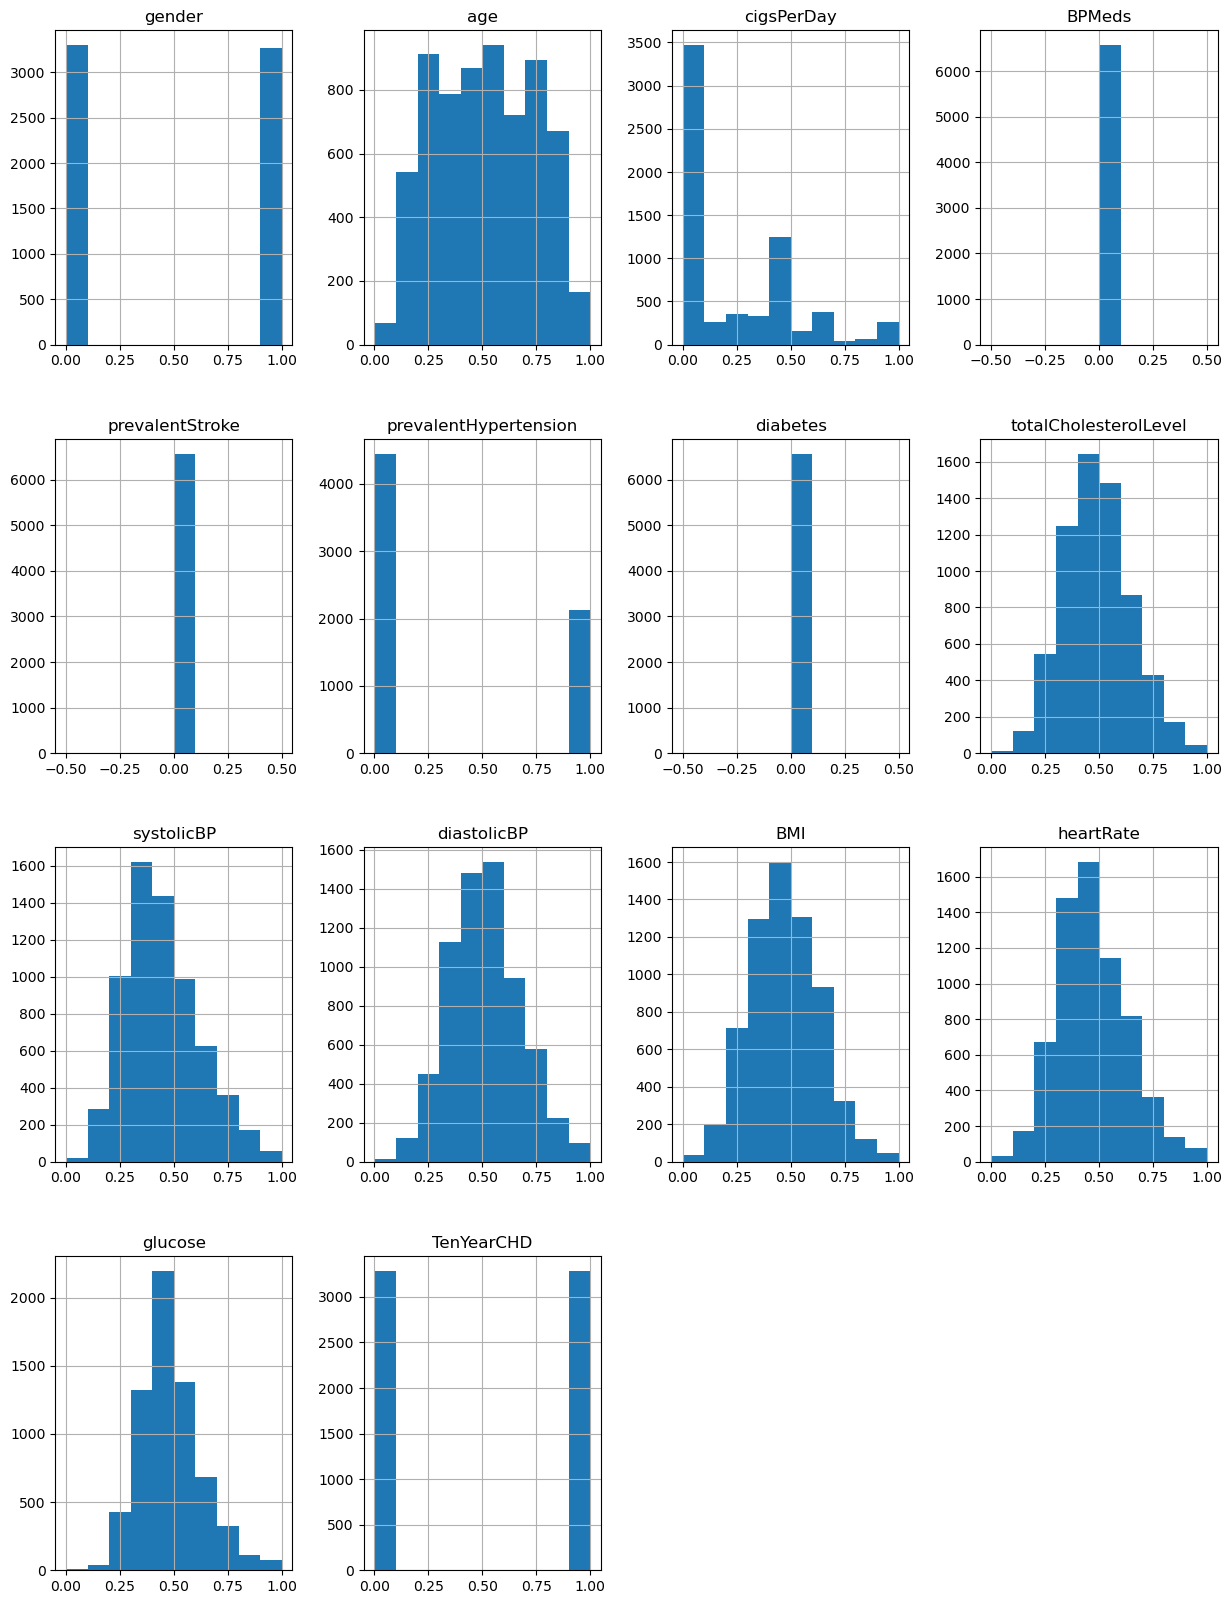

In [293]:
# checking the final distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
bestData.hist(ax = ax)

### Rebuilding the Model

In [294]:
X_train, X_test, y_train, y_test = splittingData(bestData)

In [295]:
random_forest = RandomForestClassifier(n_estimators=100, random_state = 42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [296]:
y_pred = random_forest.predict(X_test)

In [297]:
# Predicted probabilities of the positive class
y_scores = random_forest.predict_proba(X_test)[:, 1]  

In [298]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_scores)

In [299]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [300]:
metrics_dict = {'Metric': ['Recall', 'Precision', 'Accuracy', 'F1-score'],
                'Score': [recall, precision, accuracy, f1]}

metrics_df = pd.DataFrame(metrics_dict)

# Formatting the table
metrics_df.style.set_caption('Evaluation Metrics').\
    set_table_styles([{'selector': 'caption', 'props': [('text-align', 'center')]}]).\
    set_properties(**{'text-align': 'center', 'font-size': '16px'}).\
    hide_index().\
    background_gradient(cmap='Blues').\
    set_table_attributes('style="font-size: 16px; width: 400px"')

C:\Users\USER\AppData\Local\Temp\ipykernel_6344\2143909105.py:7: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  metrics_df.style.set_caption('Evaluation Metrics').\


Metric,Score
Recall,0.936017
Precision,0.883155
Accuracy,0.907661
F1-score,0.908818


In [301]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

confusion_matrix_df = pd.DataFrame(confusion_matrix,
                                  index=['Actual Positive', 'Actual Negative'],
                                  columns=['Predicted Positive', 'Predicted Negative'])

# Formatting the table
confusion_matrix_df.style.set_caption('Confusion Matrix').\
    set_table_styles([{'selector': 'caption', 'props': [('text-align', 'center')]}]).\
    set_properties(**{'text-align': 'center', 'font-size': '16px'}).\
    background_gradient(cmap='Blues').\
    set_table_attributes('style="font-size: 16px; width: 400px"')



,Predicted Positive,Predicted Negative
Actual Positive,882,120
Actual Negative,62,907


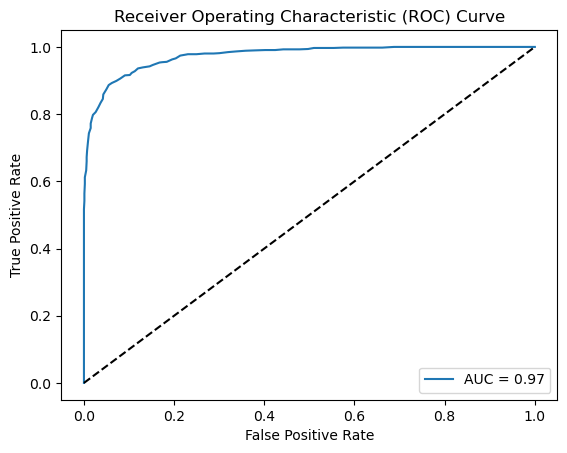

In [302]:
# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve visually depicts the trade-off between true positive rate and false positive rate. The closer the curve is to the top-left corner, the better the model's ability to discriminate between positive and negative samples.